<a href="https://colab.research.google.com/github/jmershov/AI4ALL-Projects-2020/blob/main/AI_Recommendation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle
!kaggle datasets download -d zaheenhamidani/ultimate-spotify-tracks-db

/content/gdrive/My Drive/Kaggle
 58% 9.00M/15.5M [00:00<00:00, 31.5MB/s]
100% 15.5M/15.5M [00:00<00:00, 39.1MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  ultimate-spotify-tracks-db.zip
replace SpotifyFeatures.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: SpotifyFeatures.csv     


In [ ]:
songsList = pd.read_csv("SpotifyFeatures.csv")
songs = songsList

# normalization: y = (x - min) / (max - min)
# standardization: y = (x - mean) / standard_deviation


# code for taking the average of song preferences
# when we get the data we could probably condense some of it
# each person will have a list to correspond to their preferences
# we can change the features later, this is just to test
# the list follows:
# person = [genre_0, acousticness_1, danceability_2, energy_3, instrumentalness_4, liveness_5, loudness_6, tempo_7, valence_8]
#person1 = ['Pop', 0.029600, 0.698, 0.792, 0.000039, 0.0925, -3.583, 125.976, 0.3330]
person1 = ['Pop', 0.0295, 0.581, 0.963, 0.0, 0.139, -4.087, 129.99200000000002, 0.7879999999999999] #values for Timber by Pitbull

def classify(prefs): # preferences
  global songs
  
  songs = songsList

  songs = songs[songs["genre"] == prefs[0]]

  # popularity would be lower to let smaller artists be recommended
  score = np.mean(songs['popularity']) - 10
  print(score)
  
  songs = songs[songs["popularity"] <= score]

  songs = songs[songs['popularity'] >= (score - 20)]

  songs['Acousticness Difference'] = abs(prefs[1] - songs.acousticness)

  songs['Danceability Difference'] = abs(prefs[2] - songs.danceability)

  songs['Energy Difference'] = abs(prefs[3] - songs.energy)

  songs['Instrumentalness Difference'] = abs(prefs[4] - songs.instrumentalness)

  songs['Liveness Difference'] = abs(prefs[5] - songs.liveness)

  songs['Loudness Difference'] = abs(prefs[6] - songs.loudness)

  songs['Tempo Difference'] = abs(prefs[7] - songs.tempo)

  songs['Valence Difference'] = abs(prefs[3] - songs.valence)

  songs = songs[~songs['track_name'].str.contains("Remix")]
  songs['track_name'] = songs['track_name'].str.replace('$', 'S')
  songs['artist_name'] = songs['artist_name'].str.replace('$', 'S')


classify(person1)
def norm():
  global songs
  features = ['Acousticness Difference', 'Danceability Difference', 'Energy Difference', 'Instrumentalness Difference', 'Liveness Difference', 'Loudness Difference', 'Tempo Difference', 'Valence Difference']
  for i in features:
    songs[i] = (songs[i] - min(songs[i])) / (max(songs[i]) - min(songs[i])) 

norm()
songs


56.59066695077776


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Acousticness Difference,Danceability Difference,Energy Difference,Instrumentalness Difference,Liveness Difference,Loudness Difference,Tempo Difference,Valence Difference
110071,Pop,David Guetta,This Ain't Techno,26VQvcUzPMLc1Jd8oDEbfl,51,0.000510,0.592,219253,0.946,0.397000,D,0.329,-4.863,Major,0.0618,125.964,4/4,0.1000,0.032049,0.019417,0.015484,0.440622,0.233702,0.075814,0.054236,0.932872
110443,Pop,T-Pain,1UP (feat. Profit Dinero),2tljQIUKje5ni1pA147Ot0,56,0.023600,0.705,273810,0.584,0.000000,C,0.176,-6.397,Major,0.3960,71.666,3/4,0.3500,0.006345,0.293689,0.482581,0.000000,0.045510,0.229444,0.786805,0.662631
110504,Pop,T-Pain,U Up,6p8JTP4A9NZHtxRVhkEo6s,55,0.007600,0.647,157390,0.484,0.000000,A,0.438,-10.316,Major,0.3010,85.366,4/4,0.1540,0.024157,0.152913,0.611613,0.000000,0.367774,0.621933,0.601970,0.874500
110524,Pop,T-Pain,All I Want (feat. Flipp Dinero),4FjcZsKyGhhZnuYq0nzXpZ,55,0.186000,0.514,161239,0.613,0.000000,E,0.284,-6.506,Major,0.2120,111.913,5/4,0.4390,0.173995,0.155340,0.445161,0.000000,0.178352,0.240361,0.243807,0.566425
110588,Pop,T-Pain,It's My Dog Birthday,6Uh6VBPzqT8g4ADAYVpxeM,53,0.000582,0.604,211861,0.577,0.000000,G#,0.102,-7.647,Major,0.2430,120.033,5/4,0.3150,0.031969,0.048544,0.491613,0.000000,0.045510,0.354632,0.134255,0.700465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152237,Pop,A Day To Remember,"Sometimes You're the Hammer, Sometimes You're ...",6ZjvObA6zPCLnKvI0XYdcf,55,0.001310,0.194,274034,0.978,0.000000,C,0.369,-4.802,Minor,0.2270,157.981,4/4,0.0858,0.031159,0.932039,0.012903,0.000000,0.282903,0.069705,0.377509,0.948222
152252,Pop,Sonta,Crazy over You,2SoIvGDc4dkRiii5bxGSkJ,56,0.559000,0.606,256675,0.578,0.000002,G#,0.153,-5.076,Minor,0.0373,111.928,4/4,0.1710,0.589224,0.053398,0.490323,0.000002,0.017220,0.097146,0.243605,0.856124
152256,Pop,Troye Sivan,LOST BOY,3KV9J5y3HDHKTOtjJtHwqi,54,0.047700,0.560,223794,0.889,0.000063,B,0.268,-5.148,Major,0.0493,105.989,4/4,0.4580,0.020038,0.043689,0.089032,0.000070,0.158672,0.104357,0.323732,0.545887
152259,Pop,Tank,F***in Wit Me,3v10vlZlZPApvDz3kE4aNe,55,0.298000,0.364,242307,0.537,0.000000,F#,0.191,-5.912,Minor,0.1640,185.530,3/4,0.1190,0.298675,0.519417,0.543226,0.000000,0.063961,0.180871,0.749191,0.912334


In [ ]:
def getPossibilities(songName, artist_name, gen):
  song = songsList[songsList["track_name"] == songName]
  song = song[song['artist_name'] == artist_name]
  song = song[song["genre"] == gen]
  song.pop("artist_name")
  song.pop("track_name")
  song.pop("track_id")
  song.pop("popularity")
  song.pop("duration_ms")
  song.pop("key")
  song.pop("mode")
  song.pop("speechiness")
  song.pop("time_signature")

  person2 = []
  features = song.columns.values
  for i in features:
    person2.append(song[i].values[0])
  classify(person2)
  norm()

  return person2

getPossibilities("Californication", "Red Hot Chili Peppers", "Rock")

songs

49.61939171699741


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Acousticness Difference,Danceability Difference,Energy Difference,Instrumentalness Difference,Liveness Difference,Loudness Difference,Tempo Difference,Valence Difference
153122,Rock,Joe Cocker,Up Where We Belong,0Co8hKbjUy273NrGliGdWZ,49,0.597000,0.573,233240,0.429,0.000082,D,0.0839,-8.680,Major,0.0294,139.097,4/4,0.361,0.607051,0.041769,0.523292,0.001603,0.049942,0.357783,0.395036,0.554791
153255,Rock,Justin Moore,Jesus And Jack Daniels,2SLSjuTSzJAtaOQBWW1n2P,47,0.520000,0.561,184632,0.715,0.000000,C,0.1190,-6.344,Major,0.0417,153.956,3/4,0.453,0.528461,0.071253,0.079193,0.001687,0.009270,0.210457,0.533371,0.428139
153447,Rock,The Wombats,Pink Lemonade,7dFERLugNJZUgtX1V3KA4b,49,0.004060,0.560,226107,0.956,0.000002,C,0.3580,-4.366,Major,0.0776,143.993,4/4,0.821,0.001868,0.073710,0.291925,0.001685,0.267671,0.085709,0.440617,0.070209
153451,Rock,Simple Plan,Untitled,3eRLKD1Lgc2OrYGxRxX62s,49,0.875000,0.208,239813,0.342,0.000003,F#,0.0908,-8.702,Major,0.0327,186.162,4/4,0.135,0.890791,0.938575,0.658385,0.001684,0.041947,0.359170,0.833205,0.865914
153480,Rock,Freddie Mercury,Love Me Like There's No Tomorrow,6PgdtBqsOgjA8pKFmVAsVI,49,0.272000,0.528,226827,0.451,0.000000,D,0.0601,-10.861,Major,0.0289,78.027,4/4,0.345,0.275340,0.152334,0.489130,0.001687,0.077520,0.495333,0.170128,0.576817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225042,Rock,Dustin Lynch,Little Town Livin',71Si02mnrmm1DKgpLRZTzT,44,0.182000,0.595,195027,0.812,0.000000,F#,0.0853,-4.362,Major,0.0430,124.095,4/4,0.523,0.183482,0.002457,0.068323,0.001687,0.048320,0.085457,0.255369,0.331773
225165,Rock,Brooks & Dunn,Mama Don't Get Dressed Up For Nothing - with L...,7p9SaQ9tFFncGsyv3ztfbZ,43,0.012500,0.601,252160,0.909,0.000052,D,0.0818,-4.051,Major,0.0438,125.029,4/4,0.805,0.010482,0.017199,0.218944,0.001633,0.052375,0.065843,0.264065,0.048183
225574,Rock,Bryan Adams,Shine A Light,2VP4KJfPUkJu4JYyEFMB7P,31,0.000735,0.552,206027,0.858,0.000008,C,0.1780,-3.942,Major,0.0386,126.961,4/4,0.690,0.001260,0.093366,0.139752,0.001679,0.059096,0.058968,0.282052,0.101872
225601,Rock,Bryan Adams,All Or Nothing,1e6Ys8n4kOF0ATRA2RvVfh,31,0.086100,0.664,179080,0.922,0.000000,G,0.0975,-1.181,Major,0.0541,127.023,4/4,0.851,0.085602,0.171990,0.239130,0.001687,0.034183,0.087538,0.282629,0.111509


In [ ]:
songsList[songsList['track_name'] == "Billie Jean"]
getPossibilities("Billie Jean", "Michael Jackson", "Pop")
songs

56.59066695077776


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Acousticness Difference,Danceability Difference,Energy Difference,Instrumentalness Difference,Liveness Difference,Loudness Difference,Tempo Difference,Valence Difference
110071,Pop,David Guetta,This Ain't Techno,26VQvcUzPMLc1Jd8oDEbfl,51,0.000510,0.592,219253,0.946,0.397000,D,0.329,-4.863,Major,0.0618,125.964,4/4,0.1000,0.025531,0.428188,0.619149,0.430122,0.319795,0.161624,0.102109,0.898876
110443,Pop,T-Pain,1UP (feat. Profit Dinero),2tljQIUKje5ni1pA147Ot0,56,0.023600,0.705,273810,0.584,0.000000,C,0.176,-6.397,Major,0.3960,71.666,3/4,0.3500,0.000000,0.276510,0.146809,0.016961,0.152746,0.300990,0.521001,0.491777
110504,Pop,T-Pain,U Up,6p8JTP4A9NZHtxRVhkEo6s,55,0.007600,0.647,157390,0.484,0.000000,A,0.438,-10.316,Major,0.3010,85.366,4/4,0.1540,0.017691,0.354362,0.359574,0.016961,0.438803,0.657036,0.363609,0.810943
110524,Pop,T-Pain,All I Want (feat. Flipp Dinero),4FjcZsKyGhhZnuYq0nzXpZ,55,0.186000,0.514,161239,0.613,0.000000,E,0.284,-6.506,Major,0.2120,111.913,5/4,0.4390,0.179567,0.532886,0.085106,0.016961,0.270663,0.310893,0.058626,0.346849
110588,Pop,T-Pain,It's My Dog Birthday,6Uh6VBPzqT8g4ADAYVpxeM,53,0.000582,0.604,211861,0.577,0.000000,G#,0.102,-7.647,Major,0.2430,120.033,5/4,0.3150,0.025451,0.412081,0.161702,0.016961,0.071951,0.414554,0.033971,0.548771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152237,Pop,A Day To Remember,"Sometimes You're the Hammer, Sometimes You're ...",6ZjvObA6zPCLnKvI0XYdcf,55,0.001310,0.194,274034,0.978,0.000000,C,0.369,-4.802,Minor,0.2270,157.981,4/4,0.0858,0.024646,0.962416,0.687234,0.016961,0.363468,0.156082,0.469935,0.922000
152252,Pop,Sonta,Crazy over You,2SoIvGDc4dkRiii5bxGSkJ,56,0.559000,0.606,256675,0.578,0.000002,G#,0.153,-5.076,Minor,0.0373,111.928,4/4,0.1710,0.591995,0.409396,0.159574,0.016959,0.127634,0.180976,0.058453,0.783260
152256,Pop,Troye Sivan,LOST BOY,3KV9J5y3HDHKTOtjJtHwqi,54,0.047700,0.560,223794,0.889,0.000063,B,0.268,-5.148,Major,0.0493,105.989,4/4,0.4580,0.026648,0.471141,0.497872,0.016889,0.253194,0.187517,0.126683,0.315909
152259,Pop,Tank,F***in Wit Me,3v10vlZlZPApvDz3kE4aNe,55,0.298000,0.364,242307,0.537,0.000000,F#,0.191,-5.912,Minor,0.1640,185.530,3/4,0.1190,0.303406,0.734228,0.246809,0.016961,0.169123,0.256927,0.786430,0.867937


In [ ]:
from sklearn.model_selection import train_test_split

getPossibilities("Californication", "Red Hot Chili Peppers", "Rock")


# percentages based on 100% / 1.0
acoW = .14
danW = .16
eneW = .11
insW = .2
livW = .05
louW = .07
temW = .09
valW = .18

temp = songs[['Acousticness Difference', 'Danceability Difference', 'Energy Difference', 'Instrumentalness Difference', 'Liveness Difference', 'Loudness Difference', 'Tempo Difference', 'Valence Difference']]

X = temp.to_numpy()

songs['Final Weighting'] = (songs['Acousticness Difference']*acoW + songs['Danceability Difference']*danW + songs['Energy Difference']*eneW + songs['Instrumentalness Difference']*insW + songs['Liveness Difference']*livW + songs['Loudness Difference']*louW + songs['Tempo Difference']*temW + songs['Valence Difference']*valW)

sort = songs.sort_values('Final Weighting')

sorted = sort['Final Weighting'].to_numpy()

temp2 = songs['Final Weighting']

y = []

for i in temp2.to_numpy():
  if i < sorted[9]:
    y.append('Recommend')
  else:
    y.append("Don't Recommend")

49.61939171699741


In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

classifier = classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

accuracy = classifier.score(X_test, y_test)
print(accuracy)

0.9354838709677419


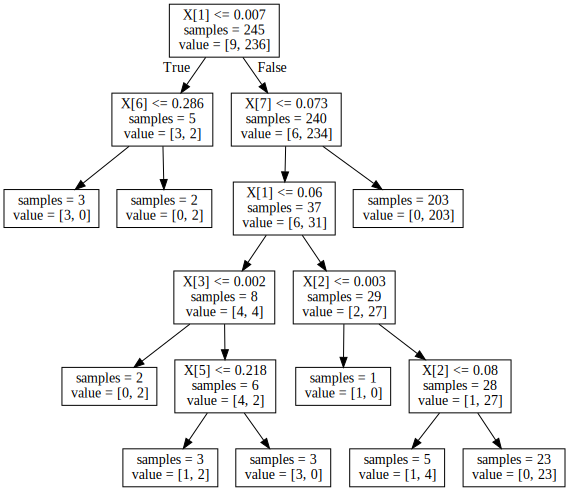

In [ ]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(classifier, out_file=None, impurity=False) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
recLis = []
nonRecLis = []

for i in range(len(X_test)):
  if y_test[i] == 'Recommend':
    recLis.append(X_test[i])
  else:
    nonRecLis.append(X_test[i])

comp = songs['Acousticness Difference'].to_numpy()
track = songs['track_name'].to_numpy()
artist = songs['artist_name'].to_numpy()
for j in range(len(comp)):
  for i in recLis:
    if comp[j] == i[0]:
      print(track[j],artist[j])

Up Where We Belong Joe Cocker
Untitled Simple Plan
Sugar Never Tasted So Good The White Stripes
My Fault Imagine Dragons
Seaside Rendezvous - Remastered 2011 Queen
Henrietta The Fratellis
You're the One The Black Keys
The Denial Twist The White Stripes
Up All Night Widespread Panic
What It Takes Aerosmith
Sittin' At a Bar - The Original Rehab
Secret Crowds Angels & Airwaves
James Brown Cage The Elephant
Casey Jones - 2001 Remaster Grateful Dead
Back Stabbin' Betty Cage The Elephant
Wasp / Behind the Wall of Sleep / Bassically/ N.I.B. - Remastered Version Black Sabbath
Big Toe The Growlers
God Save The Queen - Remastered 2011 Queen
God Save The Queen - Remastered 2011 Queen
40oz. On Repeat FIDLAR
I Know What I Am Band Of Skulls
Love Stinks The J. Geils Band
Always Something Cage The Elephant
Great Day Paul McCartney
I Just Don't Know What To Do With Myself The White Stripes
Don't Sit Down 'Cause I've Moved Your Chair Arctic Monkeys
America Imagine Dragons
Making Breakfast Twin Peaks
A L